In [56]:
import os
import re
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_row', 1000)
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 1.3 * matplotlib.rcParams['savefig.dpi']

In [57]:
# Read carriers table
carriers = pd.read_excel('carriers.xls').dropna(axis=0, how='all').reset_index(drop = True)
print carriers.shape
carriers.head()

(1491, 2)


,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [58]:
carriers.to_csv('carriers.csv')
carriers[carriers['Code'] == 'AA']

,Code,Description
100,AA,American Airlines Inc.


## ---------------------------- 

In [59]:
# Read airports data
airports = pd.read_excel('airports new.xlt').dropna(axis=0, how='all').reset_index(drop = True)
print airports.shape
airports.head()

(3376, 7)


,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [60]:
airports.to_csv('airports.csv')
airports[airports['iata'] == 'EWR']

,iata,airport,city,state,country,lat,long
1436,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661


## ---------------------------- 

In [61]:
# Read data from SQlite database (see "Create_Databse.ipynb" for more info on how the db was created)
import pandas as pd
import sqlite3
pd.set_option('display.max_rows', 8)
conn = sqlite3.connect('data/IATA.sqlite')
c = conn.cursor()

In [62]:
df = pd.read_sql_query('SELECT count(*) FROM Flights', conn)

In [63]:
df

,count(*)
0,64697923


In [64]:
df_2015 = pd.read_sql_query('SELECT * FROM Flights WHERE year = 2015', conn)

In [65]:
df_2015.shape[0]

5819079

In [66]:
df_2015.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 44
0,2015,1,22,4,2015-01-22,DL,19790,DL,N969DL,1485,...,203,134,1,950,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,22,4,2015-01-22,DL,19790,DL,N912DL,1486,...,105,90,1,762,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,22,4,2015-01-22,DL,19790,DL,N359NW,1487,...,263,240,1,1956,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,22,4,2015-01-22,DL,19790,DL,N957AT,1488,...,46,29,1,143,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,22,4,2015-01-22,DL,19790,DL,N985DL,1489,...,140,123,1,689,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# # to cartodb
# # for i,c in enumerate(df.columns):
# #     print i,c
# df_cartodb = df[[4,7,13,22,28,30]]
# df_cartodb.head()
# df_cartodb.to_csv('flights_2015.csv')

In [68]:
# Which airline had the most flights in 2015?
x = pd.DataFrame(None, index=range(len(pd.unique(df_2015.CARRIER))), columns=['Carrier','Sum'])
for i,c in enumerate(pd.unique(df_2015.CARRIER)):
    print i,
    x.loc[i]['Carrier'] = c
    x.loc[i]['Sum'] = df_2015[df_2015.CARRIER == c].shape[0]

df_airlines = pd.merge(x,carriers, left_on = 'Carrier', right_on = 'Code',how='left')
df_airlines = df_airlines.drop(['Code'],axis=1)
#df_airlines = df_airlines.drop(['Carrier','Code'],axis=1)
df_airlines.sort_values('Sum',ascending=False).reset_index(drop=True)

0 1 2 3 4 5 6 7 8 9 10 11 12 13

,Carrier,Sum,Description
0,WN,1261855,Southwest Airlines Co.
1,DL,875881,Delta Air Lines Inc.
2,AA,725984,American Airlines Inc.
3,OO,588353,Skywest Airlines Inc.
...,...,...,...
10,NK,117379,Spirit Air Lines
11,F9,90836,Frontier Airlines Inc.
12,HA,76272,Hawaiian Airlines Inc.
13,VX,61903,Virgin America


In [69]:
top10carriers = df_airlines.sort_values('Sum',ascending=False).reset_index(drop=True)['Carrier'][:10]

In [70]:
pd.set_option('display.max_row', 1000)
df_airlines.sort_values('Sum',ascending=False)

,Carrier,Sum,Description
9,WN,1261855,Southwest Airlines Co.
0,DL,875881,Delta Air Lines Inc.
12,AA,725984,American Airlines Inc.
11,OO,588353,Skywest Airlines Inc.
2,EV,571977,Atlantic Southeast Airlines
10,UA,515723,United Air Lines Inc.
5,MQ,294632,American Eagle Airlines Inc.
1,B6,267048,JetBlue Airways
7,US,198715,US Airways Inc. (Merged with America West 9/05...
13,AS,172521,Alaska Airlines Inc.


## Which airlines flew the most flights in the past 10 years?

In [71]:
df = pd.read_sql_query('''SELECT year, carrier, count(*) as flights
                          FROM Flights
                          GROUP BY year, carrier''', conn)

In [72]:
df.head()

,YEAR,CARRIER,flights
0,2006,AA,643597
1,2006,AQ,35387
2,2006,AS,159404
3,2006,B6,155732
4,2006,CO,309389


In [73]:
df_top10carriers = top10carriers.to_frame('code')
df_top10carriers = pd.merge(df_top10carriers,carriers, left_on = 'code', right_on = 'Code',how='left')
df_top10carriers = df_top10carriers.drop(['Code'],axis=1)

In [74]:
df_top10carriers.head(4)

,code,Description
0,WN,Southwest Airlines Co.
1,DL,Delta Air Lines Inc.
2,AA,American Airlines Inc.
3,OO,Skywest Airlines Inc.


In [75]:
df_top10carriers.loc[8]['Description'] = 'US Airways Inc.'

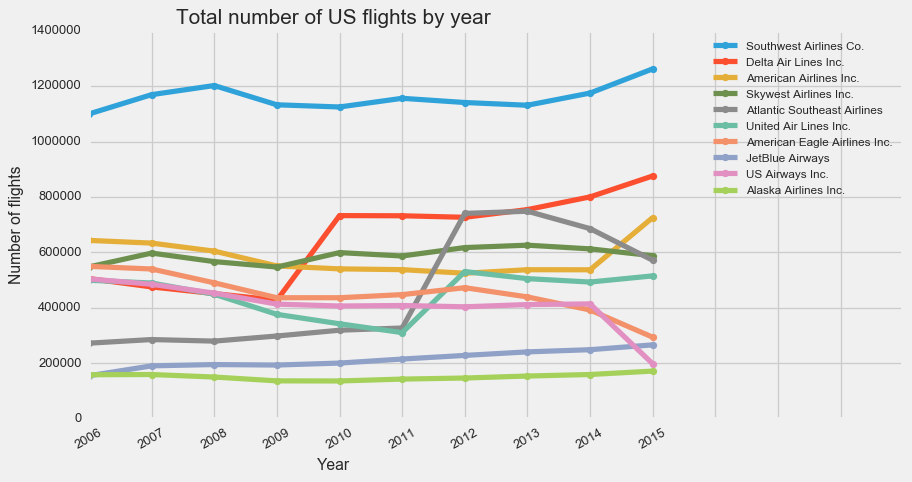

In [76]:
sns.set_context('paper')
plt.rc('figure', figsize=(10, 5))
colours = ["#30a2da","#fc4f30","#e5ae38","#6d904f","#8b8b8b"] + sns.color_palette("Set2", n_colors=5, desat=.9)
with plt.style.context('fivethirtyeight'):
    for i in xrange(10):
        plt.plot(df[df.CARRIER == str(top10carriers[i])].groupby('YEAR')['flights'].sum(),'o-',color = colours[i])
    plt.xlabel('Year',fontsize = 12,position=(0.3,1))
    plt.ylabel('Number of flights',fontsize = 12)
    plt.xticks(range(2006,2020),range(2006,2016),rotation=30)
    plt.tick_params(labelsize=10)
    plt.title('Total number of US flights by year',fontsize = 16,position=(0.3,1))
    plt.legend(df_top10carriers['Description'], loc=1,fontsize = 9)

In [77]:
#select top 1 percent * from [tablename] order by newid()

## -------------------------------

## Which airports were the busiest in 2015?

In [78]:
df = pd.read_sql_query('''SELECT year, ORIGIN, count(*) as flights
                          FROM Flights
                          GROUP BY year, ORIGIN''', conn)

In [79]:
# Which airline had the most flights in 2015?
x = pd.DataFrame(None, index=range(len(pd.unique(df_2015.ORIGIN))), columns=['Airport','Sum'])
for i,c in enumerate(pd.unique(df_2015.ORIGIN)):
    print i,
    x.loc[i]['Airport'] = c
    x.loc[i]['Sum'] = df_2015[df_2015.ORIGIN == c].shape[0]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [80]:
x.head()

,Airport,Sum
0,LGA,108195
1,ATL,379424
2,SAN,76416
3,IAH,159833
4,DTW,118425


In [81]:
df_airports = pd.merge(x,airports, left_on = 'Airport', right_on = 'iata',how='left')
df_airports = df_airports.drop(['iata'],axis=1)
df_airports = df_airports.sort_values('Sum',ascending=False).reset_index(drop=True)

In [82]:
df_airports.head(20)

,Airport,Sum,airport,city,state,country,lat,long
0,ATL,379424,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
1,ORD,313536,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
2,DFW,260595,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200
3,DEN,214191,Denver Intl,Denver,CO,USA,39.858408,-104.667002
4,LAX,212401,Los Angeles International,Los Angeles,CA,USA,33.942536,-118.408074
5,SFO,162178,San Francisco International,San Francisco,CA,USA,37.619002,-122.374843
6,IAH,159833,George Bush Intercontinental,Houston,TX,USA,29.980472,-95.339722
7,PHX,159736,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
8,LAS,145869,McCarran International,Las Vegas,NV,USA,36.080361,-115.152333
9,MSP,122701,Minneapolis-St Paul Intl,Minneapolis,MN,USA,44.880547,-93.216922


In [83]:
df_airports[:20].to_csv('20_busiest_airports.csv')

In [84]:
#https://jerez.cartodb.com/tables/busiest_airports/map

## -------------------------------------

In [85]:
df = pd.read_sql_query('''SELECT year, carrier, count(*) as flights
                          FROM Flights
                          WHERE ORIGIN in ('ATL','ORD','DFW','DEN','LAX','SFO','IAH','PHX','LAS','MSP','SEA','MCO','DTW','BOS','EWR','CLT','LGA','SLC','JFK','BWI')
                                           OR DEST in ('ATL','ORD','DFW','DEN','LAX','SFO','IAH','PHX','LAS','MSP','SEA','MCO','DTW','BOS','EWR','CLT','LGA','SLC','JFK','BWI')
                          GROUP BY year, carrier''', conn)

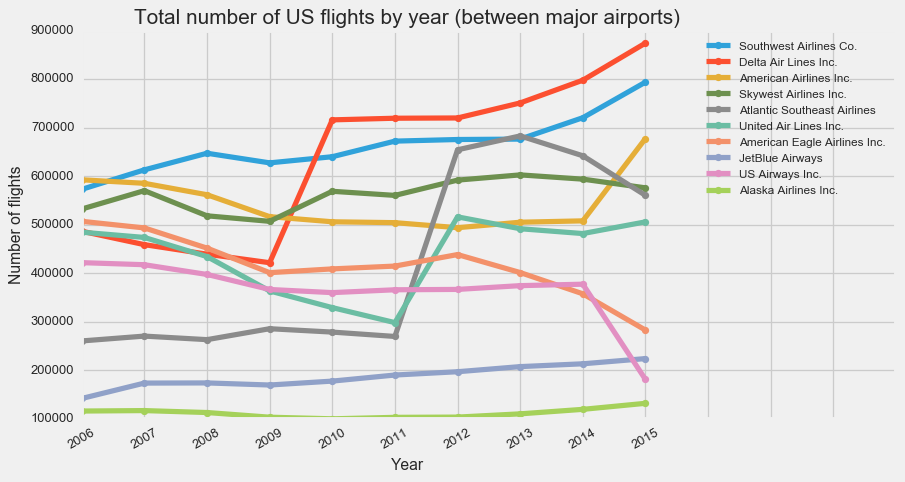

In [86]:
sns.set_context('paper')
plt.rc('figure', figsize=(10, 5))
colours = ["#30a2da","#fc4f30","#e5ae38","#6d904f","#8b8b8b"] + sns.color_palette("Set2", n_colors=5, desat=.9)
with plt.style.context('fivethirtyeight'):
    for i in xrange(10):
        plt.plot(df[df.CARRIER == str(top10carriers[i])].groupby('YEAR')['flights'].sum(),'o-',color = colours[i])
    plt.xlabel('Year',fontsize = 12,position=(0.4,1))
    plt.ylabel('Number of flights',fontsize = 12)
    plt.xticks(range(2006,2020),range(2006,2016),rotation=30)
    plt.tick_params(labelsize=10)
    plt.title('Total number of US flights by year (between major airports)',fontsize = 16,position=(0.4,1))
    plt.legend(df_top10carriers['Description'], loc=1,fontsize = 9)

## -------------------------------------

## Cause of flight delays in 2015

In [118]:
# What proportion of flights were cancelled?
(df_2015.groupby('CANCELLED')['FL_DATE'].count() / df_2015.shape[0] * 100).round(2)

CANCELLED
0    98.46
1     1.54
Name: FL_DATE, dtype: float64

In [119]:
# What proportion of flights were cancelled?
# Code,Description
# "A","Carrier"
# "B","Weather"
# "C","National Air System"
# "D","Security"
(df_2015.groupby('CANCELLATION_CODE')['FL_DATE'].count() / float(df_2015.shape[0])* 100).round(2)

CANCELLATION_CODE
A    0.43
B    0.84
C    0.27
D    0.00
Name: FL_DATE, dtype: float64

In [120]:
# What proportion of flights were delayed?
round((df_2015[df_2015['DEP_DELAY'] > 10].shape[0] / float(df_2015.shape[0])*100),2)

21.3

In [121]:
df_2015 = df_2015[pd.notnull(df_2015['DEP_TIME'])]

In [122]:
df_2015['DEP_TIME'].isnull().sum()

0

In [123]:
df_2015['dep_hour'] = df_2015['DEP_TIME'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))

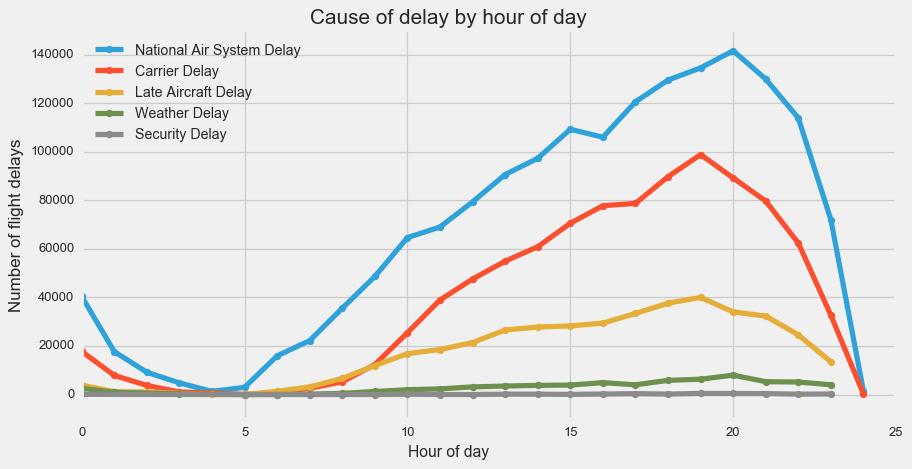

In [125]:
sns.set_context('paper')
plt.rc('figure', figsize=(10, 5))
legend = ['National Air System Delay','Carrier Delay','Late Aircraft Delay','Weather Delay','Security Delay']
colours = ["#30a2da","#fc4f30","#e5ae38","#6d904f","#8b8b8b"] + sns.color_palette("Set2", n_colors=5, desat=.9)
with plt.style.context('fivethirtyeight'):
    plt.plot(df_2015[df_2015['NAS_DELAY']==1].groupby('dep_hour')['DEP_DELAY'].sum(),'o-')
    plt.plot(df_2015[df_2015['CARRIER_DELAY']==1].groupby('dep_hour')['DEP_DELAY'].sum(),'o-')
    plt.plot(df_2015[df_2015['LATE_AIRCRAFT_DELAY']==1].groupby('dep_hour')['DEP_DELAY'].sum(),'o-')
    plt.plot(df_2015[df_2015['WEATHER_DELAY']==1].groupby('dep_hour')['DEP_DELAY'].sum(),'o-')
    plt.plot(df_2015[df_2015['SECURITY_DELAY']==1].groupby('dep_hour')['DEP_DELAY'].sum(),'o-')
    plt.xlabel('Hour of day',fontsize = 12,position=(0.45,1))
    plt.ylabel('Number of flight delays',fontsize = 13)
    plt.tick_params(labelsize=10)
    plt.title('Cause of delay by hour of day',fontsize = 16, position=(0.45,1))
    plt.legend(legend, loc=2,fontsize = 11)
    plt.ylim([-10000,150000])

## Now lets focus on NYC... 

In [136]:
# df_2015[df_2015['ORIGIN'] == 'JFK'].shape[0]

# df_2015[df_2015['ORIGIN'] == 'JFK'].groupby('MONTH')['FLIGHTS'].sum().plot(alpha=0.9)
# df_2015[df_2015['ORIGIN'] == 'LGA'].groupby('MONTH')['FLIGHTS'].sum().plot(alpha=0.9)
# df_2015[df_2015['ORIGIN'] == 'EWR'].groupby('MONTH')['FLIGHTS'].sum().plot(alpha=0.9)
# plt.legend(['JFK','LGA','EWR'])

# # dfmain = pd.read_sql_query('''SELECT * 
# #                           FROM Flights
# #                           WHERE weather_delay NOT LIKE 'NaN' AND weather_delay != 0
# #                           LIMIT 10 ''', conn)

# # df = pd.read_sql_query('''SELECT * 
# #                           FROM Flights
# #                           LEFT JOIN Carriers on (Carriers.Code = Flights.Carrier)
# #                           LEFT JOIN Airports on (Airports.iata = Flights.ORIGIN)
# #                           ''', conn)

In [139]:
df_2015.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE',
       u'UNIQUE_CARRIER', u'AIRLINE_ID', u'CARRIER', u'TAIL_NUM', u'FL_NUM',
       u'ORIGIN_AIRPORT_ID', u'ORIGIN_AIRPORT_SEQ_ID',
       u'ORIGIN_CITY_MARKET_ID', u'ORIGIN', u'ORIGIN_CITY_NAME',
       u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_FIPS', u'ORIGIN_STATE_NM',
       u'ORIGIN_WAC', u'DEST_AIRPORT_ID', u'DEST_AIRPORT_SEQ_ID',
       u'DEST_CITY_MARKET_ID', u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR',
       u'DEST_STATE_FIPS', u'DEST_STATE_NM', u'DEST_WAC', u'DEP_TIME',
       u'DEP_DELAY', u'ARR_TIME', u'ARR_DELAY', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'ACTUAL_ELAPSED_TIME', u'AIR_TIME',
       u'FLIGHTS', u'DISTANCE', u'CARRIER_DELAY', u'WEATHER_DELAY',
       u'NAS_DELAY', u'SECURITY_DELAY', u'LATE_AIRCRAFT_DELAY', u'Unnamed: 44',
       u'dep_hour'],
      dtype='object')

In [218]:
df = pd.read_sql_query('''SELECT MONTH,DAY_OF_WEEK,FL_DATE,DEP_TIME,WEATHER_DELAY,NAS_DELAY
                          FROM Flights
                          WHERE ORIGIN in ('JFK','LGA','EWR')
                          ''', conn)

In [219]:
df.shape

(3441467, 6)

### Get weather  data for 2006 - 2015

In [ ]:
import urllib2
import datetime
import os.path
import glob
import ujson

PATH = '/Users/Jonathan/spotify/weather_data/'

start_date = datetime.date(2006,01,01)
end_date = datetime.date(2014,12,31)

delta = datetime.timedelta(days=1)
while start_date <= end_date:
    url = 'http://api.wunderground.com/api/%s/history_YYYYMMDD/q/NY/New_York_City.json' % 'e7cb14d1c7eeaf3f'
    converted = start_date.strftime('%Y-%m-%d').replace('-','')
    file_name = PATH + converted + '.json'

    if os.path.isfile(file_name):
        print 'already have %s' % file_name
        start_date += delta
        continue

    print 'grabbing %s' % file_name
    page = urllib2.urlopen(url.replace('YYYYMMDD', converted))
    content = page.read()
    with open(file_name, 'w') as fid:
        fid.write(content)

    start_date += delta

In [ ]:
from os import listdir
import re
from os.path import isfile, join
onlyfiles = [f for f in listdir(PATH) if isfile(join(PATH, f))]
print onlyfiles
only_weather_files = [f for f in onlyfiles if re.search(r'20\d+.json',f)]
for filename in only_weather_files:
    print filename,

In [ ]:
# Convert to csv
import ujson
with open(PATH + 'temps.csv', 'w') as csv:
    csv.write('datetime,temp,humidity,windspeed,visibility,rain,snow\n')
    for fname in only_weather_files:
        print fname,
        with open(PATH +fname, 'r') as f:
            f = f.read().replace('-9999.0', 'NA').replace('-9999', 'NA')
            #print f,
            try:
                j = ujson.loads(f)
                for obs in j['history']['observations']:
                    dt = '%s-%s-%s %s:%s:00' % (obs['date']['year'], obs['date']['mon'], obs['date']['mday'], obs['date']['hour'], obs['date']['min'])
                    csv.write('%s,%s,%s,%s,%s,%s,%s\n' % (dt, obs['tempi'], obs['hum'], obs['wspdi'], obs['visi'], obs['rain'], obs['snow']))
            except:
                pass

In [220]:
weather = pd.read_csv('/Users/Jonathan/spotify/weather_data/temps.csv')
from datetime import datetime
weather['datetime'] = weather['datetime'].\
                        apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S').\
                              replace(minute=0).strftime('%Y-%m-%d %H:%M:%S'))

In [221]:
weather = weather.ffill()
weather.head(3)

,datetime,temp,humidity,windspeed,visibility,rain,snow
0,2006-01-01 00:00:00,32,85,4.6,10,0,0
1,2006-01-01 01:00:00,32,87,0.0,8,0,0
2,2006-01-01 01:00:00,32,85,4.6,9,0,0


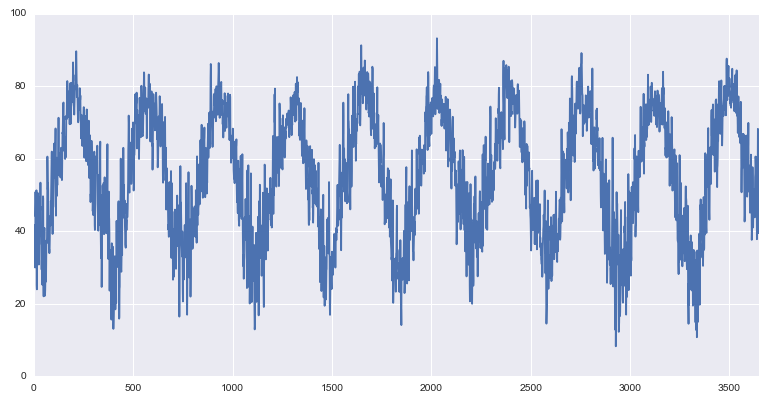

In [222]:
weather['date'] = weather['datetime'].apply(lambda x: x.split()[0])
del weather['datetime']
weather = weather.groupby('date')[['temp','humidity','windspeed','visibility','rain','snow']].mean().reset_index()
weather['temp'].plot()

In [223]:
weather.head(3)

,date,temp,humidity,windspeed,visibility,rain,snow
0,2006-01-01,37.442308,75.307692,2.357692,9.538462,0.000000,0
1,2006-01-02,41.738462,73.846154,5.246154,7.884615,0.423077,0
2,2006-01-03,36.754054,86.594595,14.637838,6.878378,0.378378,0


In [224]:
df_weather = pd.merge(df,weather,left_on = 'FL_DATE', right_on = 'date' ,how='left')
df_weather = df_weather.drop(['date'],axis=1)
df_weather.head(4)

,MONTH,DAY_OF_WEEK,FL_DATE,DEP_TIME,WEATHER_DELAY,NAS_DELAY,temp,humidity,windspeed,visibility,rain,snow
0,1,4,2015-01-22,2045,NaN,NaN,33.418919,57.027027,3.935135,6.986486,0,0
1,1,4,2015-01-22,659,NaN,NaN,33.418919,57.027027,3.935135,6.986486,0,0
2,1,4,2015-01-22,1832,NaN,NaN,33.418919,57.027027,3.935135,6.986486,0,0
3,1,4,2015-01-22,1630,NaN,NaN,33.418919,57.027027,3.935135,6.986486,0,0


## Predict NYC departure delays due to weather

In [290]:
df = df_weather
df.shape[0]
df = df.dropna(how='any')

In [291]:
from sklearn import base, metrics
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score, KFold

print df.columns

Index([u'MONTH', u'DAY_OF_WEEK', u'FL_DATE', u'DEP_TIME', u'WEATHER_DELAY',
       u'NAS_DELAY', u'temp', u'humidity', u'windspeed', u'visibility',
       u'rain', u'snow'],
      dtype='object')


In [292]:
df.columns

Index([u'MONTH', u'DAY_OF_WEEK', u'FL_DATE', u'DEP_TIME', u'WEATHER_DELAY',
       u'NAS_DELAY', u'temp', u'humidity', u'windspeed', u'visibility',
       u'rain', u'snow'],
      dtype='object')

In [295]:
from sklearn import datasets, tree, utils

X = df[['MONTH','DAY_OF_WEEK','DEP_TIME','temp','humidity','windspeed','visibility','rain','snow']] 
y = df['WEATHER_DELAY']

tree_clf = tree.DecisionTreeClassifier(max_depth=10)

cv = cross_validation.ShuffleSplit(len(y), n_iter=20, test_size=0.2, random_state=42)
r2 =  cross_validation.cross_val_score(tree_clf, X, y, cv=cv).mean()
score = r2
mse =  - cross_validation.cross_val_score(tree_clf, X, y, cv=cv, scoring='mean_squared_error').mean()
np.sqrt(mse)

21.986329621781305

In [297]:
score

0.92785284855425121

In [298]:
# feature importance
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
tree_clf = tree.DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
tree_clf.feature_importances_

array([ 0.02171616,  0.01192802,  0.21086243,  0.15557339,  0.055542  ,
        0.07193885,  0.19127061,  0.07242597,  0.20874259])

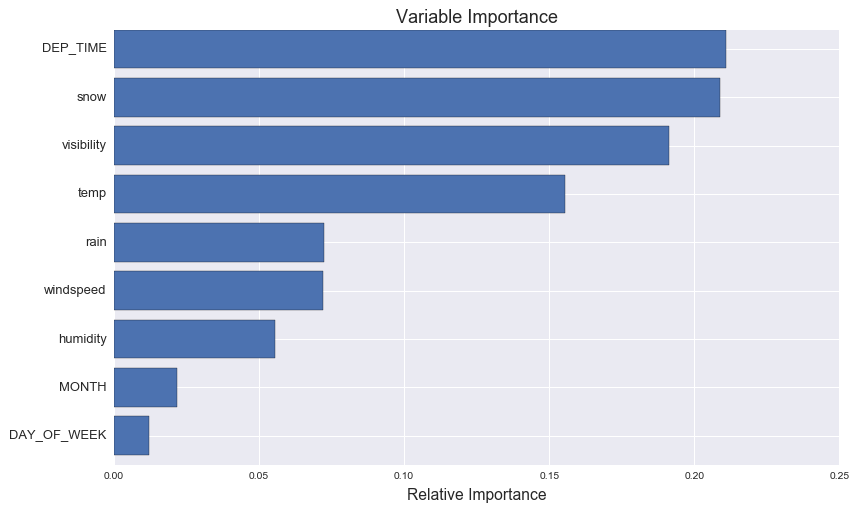

In [299]:
names = ['MONTH','DAY_OF_WEEK','DEP_TIME','temp','humidity','windspeed','visibility','rain','snow']
imp = tree_clf.feature_importances_
imp, names = zip(*sorted(zip(imp,names)))
# make importances relative to max importance
plt.rcParams['figure.figsize'] = (10, 6)

plt.barh(np.arange(len(names))+.6, imp, align='center')
plt.yticks(np.arange(len(names))+.6, names,fontsize = 10)
plt.xlabel('Relative Importance',fontsize = 12)
plt.title('Variable Importance',fontsize = 14)
plt.show()